<a href="https://colab.research.google.com/github/lucianoigit/Data_scientist/blob/main/Arbol_Regresor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
autor: Luciano Iriarte
tema: Arboles de desiion como regresor


"""

'\nautor: Luciano Iriarte\ntema: Arboles de desiion como regresor\n\n\n'

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeRegressor,plot_tree
warnings.filterwarnings("ignore")

In [ ]:
# cargo los datos en un dataframe
# me interesa ver si podemos encontrar relaciones entre algunas variables continuas
data=sns.load_dataset("anscombe")




In [ ]:
# veo el dataset
print(data.shape)
print(data.head(10))
print(data.columns)
print(data.tail())

(44, 3)
  dataset     x      y
0       I  10.0   8.04
1       I   8.0   6.95
2       I  13.0   7.58
3       I   9.0   8.81
4       I  11.0   8.33
5       I  14.0   9.96
6       I   6.0   7.24
7       I   4.0   4.26
8       I  12.0  10.84
9       I   7.0   4.82
Index(['dataset', 'x', 'y'], dtype='object')
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [80]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
print(data.isnull().sum())

dataset    0
x          0
y          0
dtype: int64


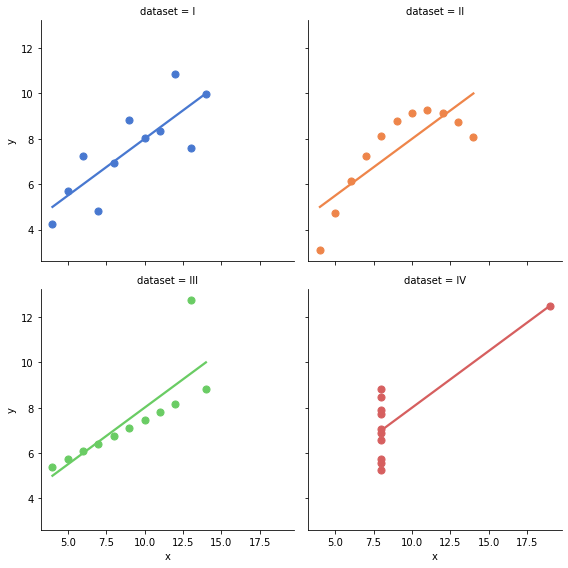

In [ ]:
#show the result of a lineaer regression whith dataset
sns.lmplot(
    data=data, x="x",y="y",col="dataset",hue="dataset",
    col_wrap=2,palette="muted",ci=None,  # organizo el grafico
    height=4,scatter_kws={"s":50,"alpha":1}
)


In [ ]:
# en este caso solo me interesa el dataset 2
data2=data[data.dataset=="II"]

data2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


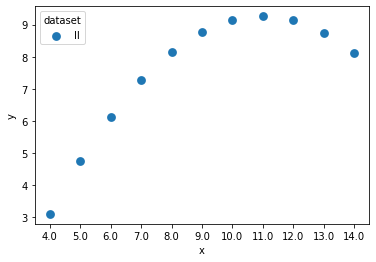

In [ ]:
# Grafifo el nuevo dataset
sns.pointplot(x="x",
             y="y",
             data=data2,
              linestyles="",hue="dataset",
              
              )

In [ ]:
# defino las variabls predictoras e independiente
y=data2.pop("y")# variable independiente
y

11    9.14
12    8.14
13    8.74
14    8.77
15    9.26
16    8.10
17    6.13
18    3.10
19    9.13
20    7.26
21    4.74
Name: y, dtype: float64

In [ ]:
# realizo la regression
df=DecisionTreeRegressor(random_state=16) 
# entreno y dejo que el arbol crezca con los parametros default
x_train=data2["x"].to_frame()
df.fit(x_train,y)



DecisionTreeRegressor(random_state=16)

In [83]:
# le pido que haga una prediccion sobre otros valores y grafico con otro xolo sobre X_test
# la prediccion la realizo en valores intermedios
d=[[4.5],[6.5],[8.5],[10.5],[12.5]]
x_test=pd.DataFrame(d) # convierto en un dataframe
y_pred=df.predict(x_test)
print(y_pred)


[3.1  6.13 8.14 9.14 9.13]


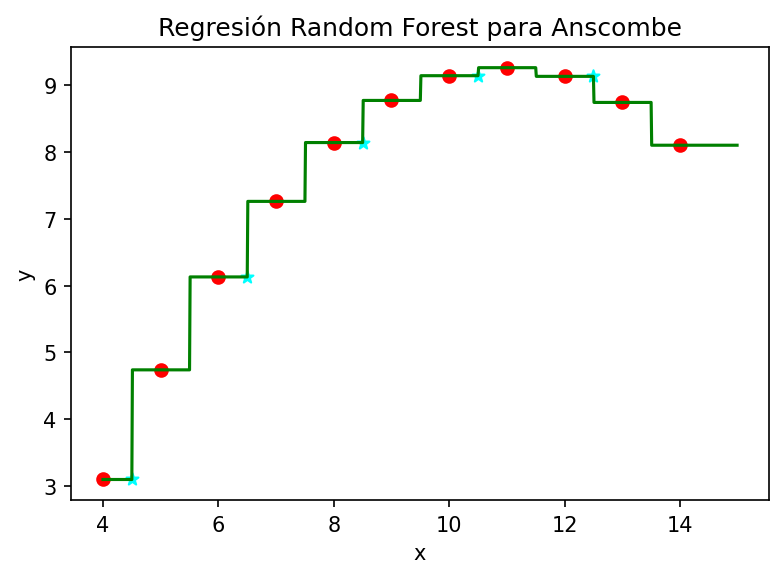

In [93]:
# defino el rango de x para graficar
x_vect = np.arange(4.0, 15., 0.01) # es un vector numpy, NO pandas
x_graf = x_vect.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col

# armo el grafico
plt.figure(dpi=150)   # abro figura
plt.scatter(x_train, y, c = 'red')     # grafica los datos de entrenamiento
plt.plot(x_graf ,df.predict(x_graf), color = 'green') # id predicción sbore x_graf
plt.scatter(x_test, y_pred, color='cyan', marker='*')# grafico los puntos y suprediccion
plt.plot()
plt.title(f'Regresión Random Forest para Anscombe')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('anscombe.png', dpi = 300)  # guardo en archivo
plt.show()  # muestro gráfico
plt.close() # cierro figura

In [94]:
# veo como funciona la prediccion sobre los datos ingresados
print('\n')
print(f'Precisión sobre valores REALES: {df.score(x_train, y)}')
print(f'Precisión sobre valores PREDICCION: {df.score(x_graf, df.predict(x_graf))}')
print('\n')



Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0




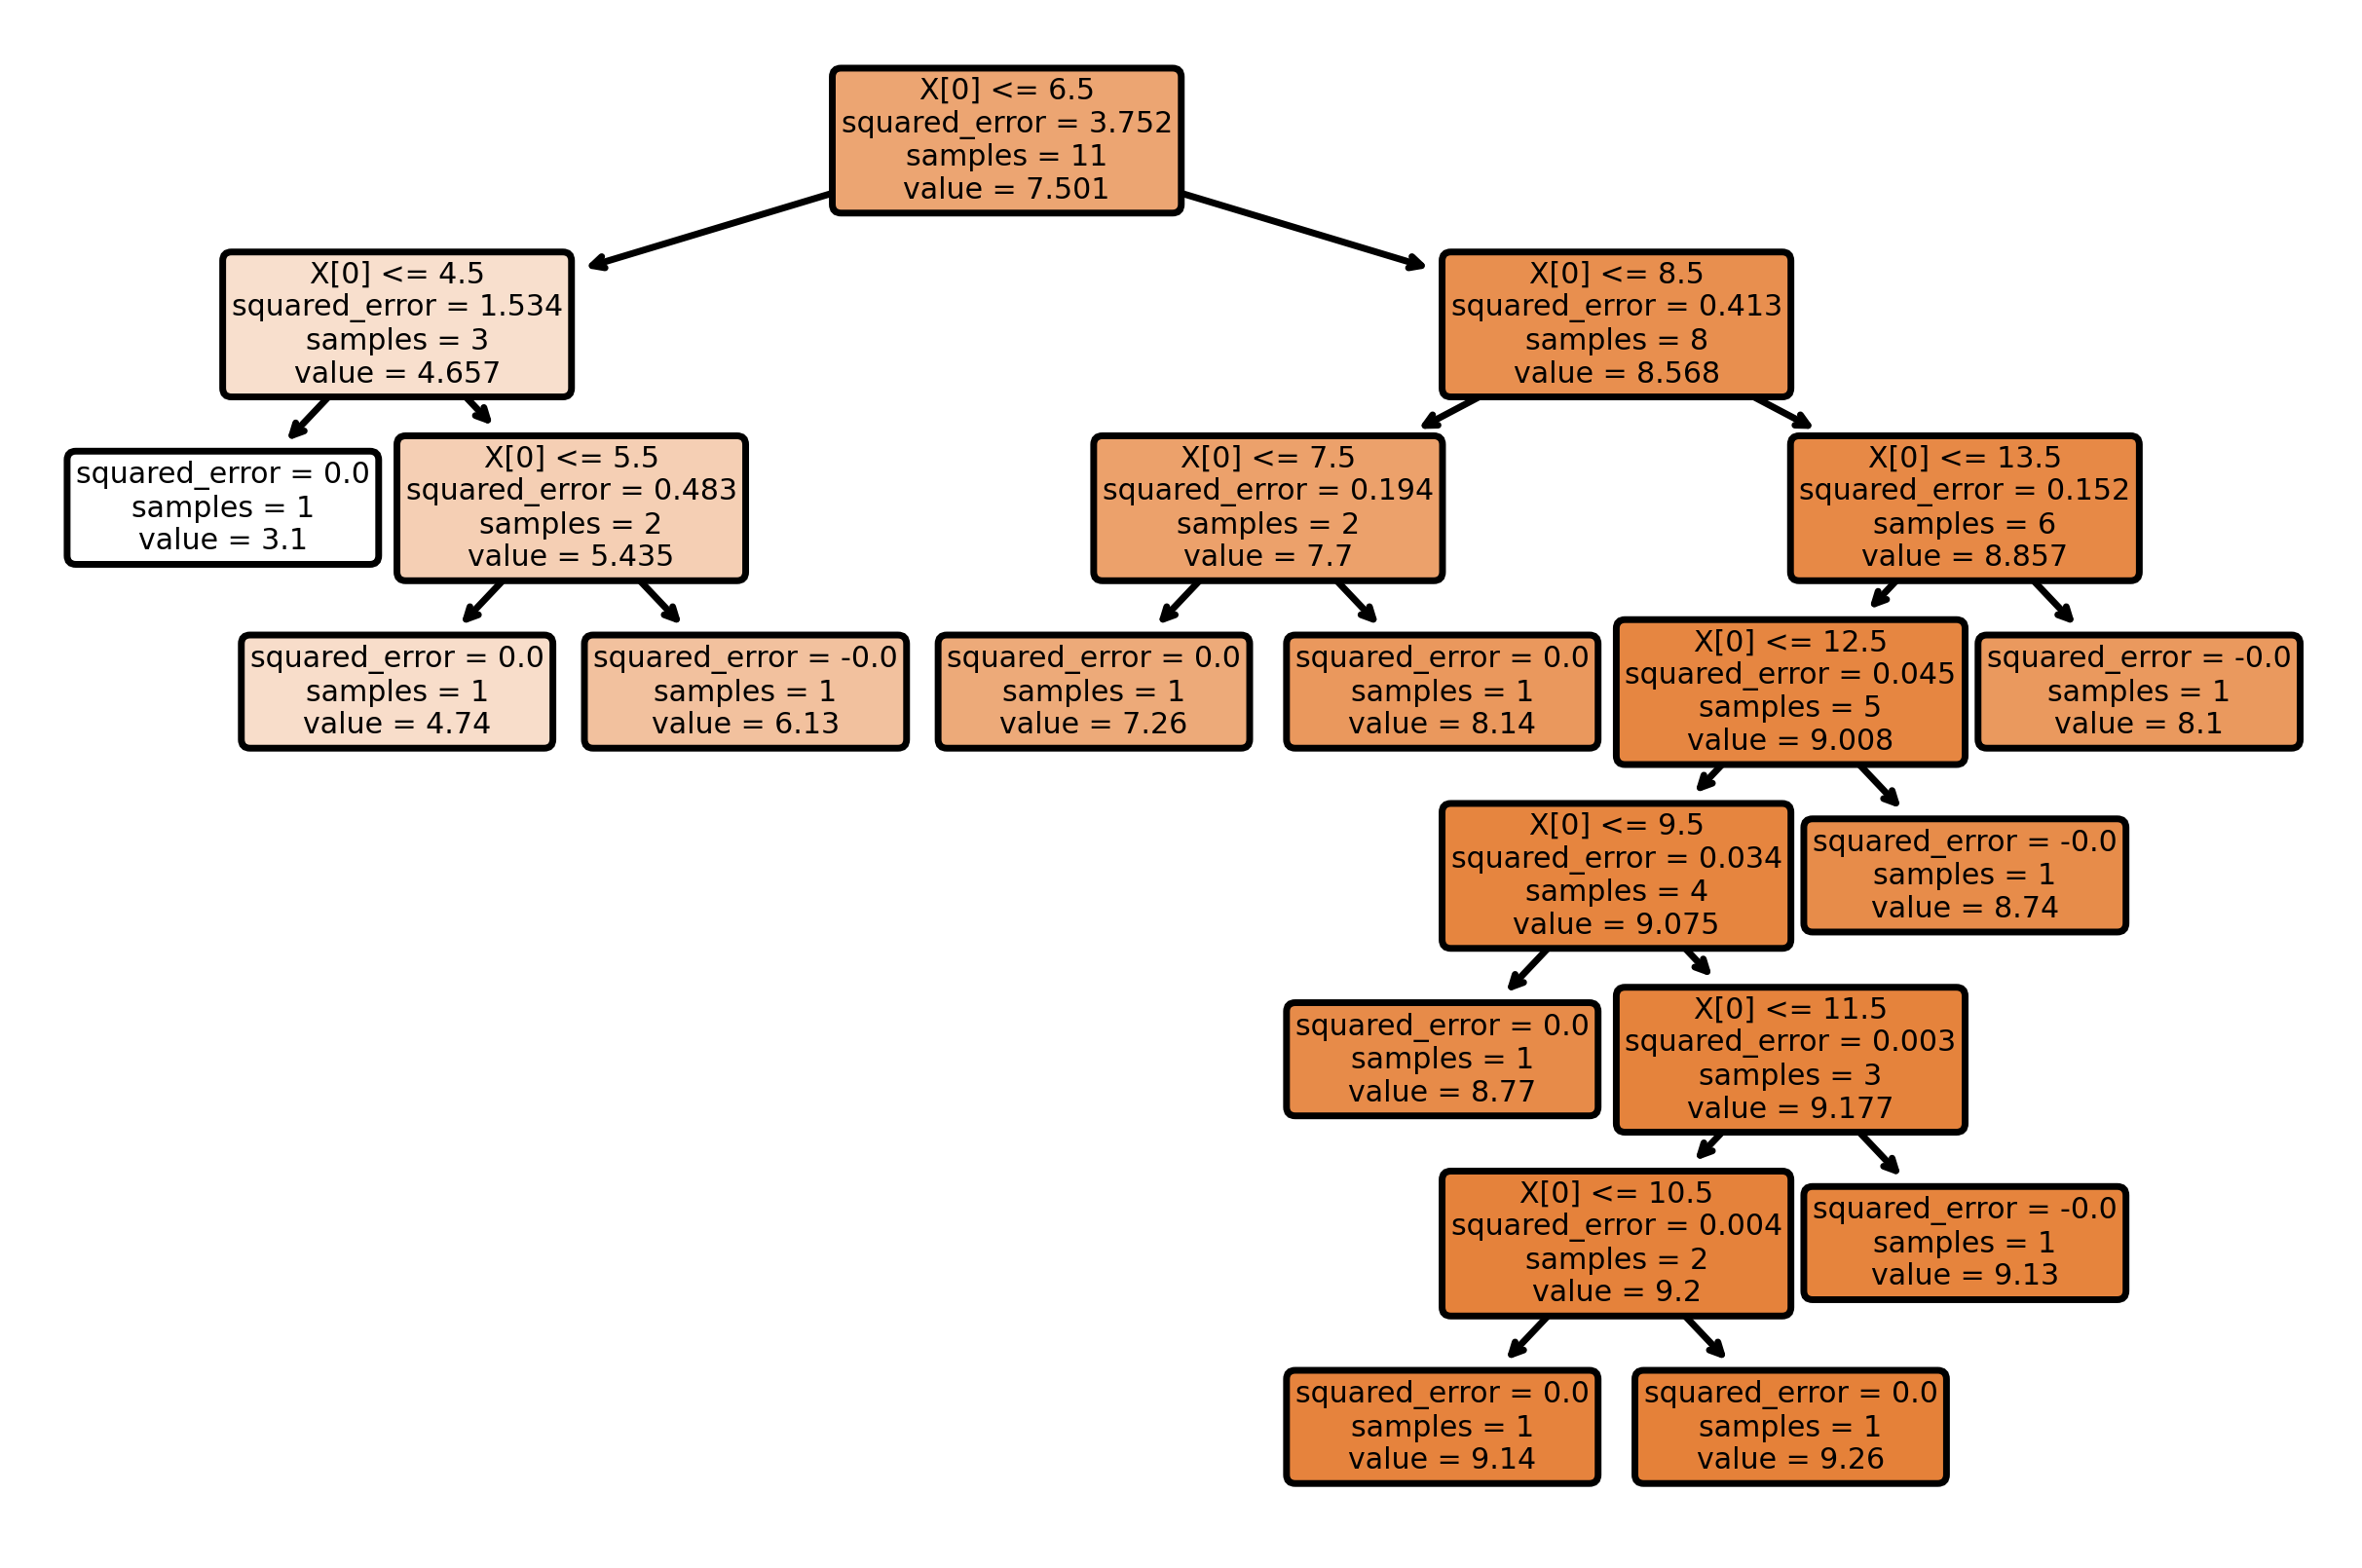

In [95]:
# gráfico el árbol que hace la regresión
plt.figure(dpi=500)
plot_tree(df, filled=True, rounded=True) 
plt.show()
plt.close() 